In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
insurance_data=pd.read_csv(r'C:\Users\dataset\insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#getting info about dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Data analysis
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


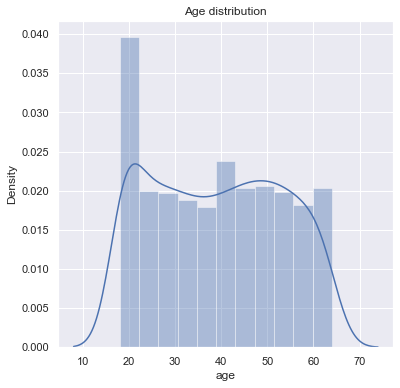

In [10]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age distribution')
plt.show()

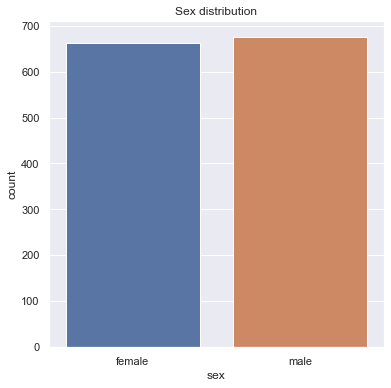

In [11]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex distribution')
plt.show()

In [12]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


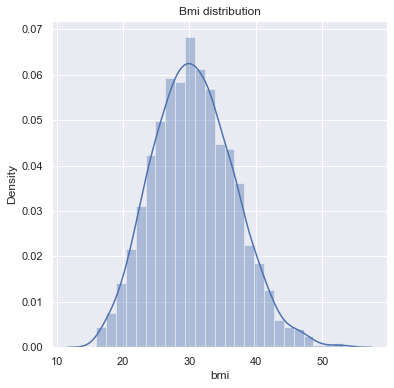

In [23]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('Bmi distribution')
plt.show()

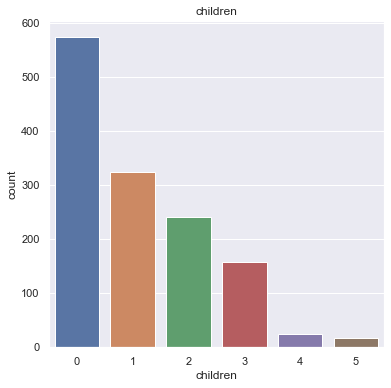

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('children')
plt.show()

In [18]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [16]:
insurance_data['smoker'].value_counts()

1    1064
0     274
Name: smoker, dtype: int64

In [17]:
insurance_data['region'].value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


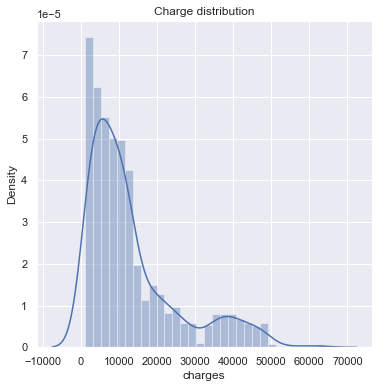

In [15]:
#distribution of charges
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charge distribution')
plt.show()

In [21]:
#data preprocessing
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [25]:
#splitting the features and target
X=insurance_data.drop(columns='charges',axis=1)
Y=insurance_data['charges']

In [26]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [27]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [55]:
#Splitting data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [53]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [41]:
#Model Training
regressor=LinearRegression()

In [57]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [58]:
training_data_prediction=regressor.predict(X_train)

In [59]:
# R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [60]:
#test data prediction
test_data_prediction=regressor.predict(X_test)

In [61]:
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7447273869684077


In [63]:
#Building a predictive system
input_data=(31,0,25.74,0,0,1)
#changing input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD',prediction[0])

[27874.28755473]
The insurance cost is USD 27874.28755473146
